Họ và tên: `Phạm Ngọc Tân`     
MSSV: `19520295`

In [ ]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!pip install imgkit

In [9]:
!pip install folium

In [2]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1930 (delta 308), reused 500 (delta 269), pack-reused 1340
Receiving objects: 100% (1930/1930), 179.02 MiB | 23.31 MiB/s, done.
Resolving deltas: 100% (985/985), done.
Checking out files: 100% (542/542), done.


In [76]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os
import imgkit
import time
import sys
from selenium import webdriver
import random
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap

In [127]:
df = gpd.read_file('CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [130]:
# Load ranh giới quận huyện và dân số quận huyện
df = df.to_crs('epsg: 4326')
df

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.4000,24294.9000,24292.9000,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.6000,38362.1000,38704.4000,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.1000,43857.0000,44204.0000,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.5000,35490.8000,35594.2000,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.3900,7796.0600,7616.0700,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,239826.0,241327.0,234819.0,40354.6000,40723.4000,41404.2000,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((106.66909 10.75992, 106.66888 10.759..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,234291.0,237110.0,209867.0,44207.9000,45315.2000,46076.6000,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((106.65855 10.76900, 106.65885 10.767..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,181780.0,183288.0,163961.0,35692.6000,35823.5000,36246.2000,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((106.67277 10.81412, 106.67361 10.813..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,469526.0,470699.0,474792.0,18796.9000,19185.2000,19357.3000,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((106.64909 10.83662, 106.65187 10.836..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,489657.0,490618.0,499164.0,22005.5000,22616.2000,23293.7000,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((106.69197 10.80032, 106.69198 10.800..."


In [131]:
# Load dữ liệu click của người dùng
click_file = gpd.read_file('CSL_HCMC/14-09.json')
click_file

,FID,dbh,geometry
0,0,1,POINT (106.62994 10.72644)
1,1,1,POINT (106.72987 10.79673)
2,2,1,POINT (106.65731 10.84212)
3,3,1,POINT (106.60434 10.74079)
4,4,1,POINT (106.71608 10.78999)
...,...,...,...
27771,27771,1,POINT (106.58536 10.79847)
27772,27772,1,POINT (106.69992 10.75601)
27773,27773,1,POINT (106.64973 10.77202)
27774,27774,1,POINT (106.68181 10.80059)


In [132]:
click_file = click_file.to_crs('epsg: 4326')
click_file

,FID,dbh,geometry
0,0,1,POINT (106.62994 10.72644)
1,1,1,POINT (106.72987 10.79673)
2,2,1,POINT (106.65731 10.84212)
3,3,1,POINT (106.60434 10.74079)
4,4,1,POINT (106.71608 10.78999)
...,...,...,...
27771,27771,1,POINT (106.58536 10.79847)
27772,27772,1,POINT (106.69992 10.75601)
27773,27773,1,POINT (106.64973 10.77202)
27774,27774,1,POINT (106.68181 10.80059)


In [133]:
# Lọc ra 10 quận huyện có tốc độ tăng dân số nhanh nhất (Pop2019/Pop2017)
df['Fastest_grow_rate'] = df.apply(lambda row: 0)
df['Fastest_grow_rate'] = df.apply(lambda row: df['Pop_2019']/df['Pop_2017'])
df = df.nlargest(10, ['Fastest_grow_rate']) 

In [134]:
top_10_district = np.array(df["Dist_Name"])
print('Top 10 quận có tốc độ tăng trưởng nhanh nhất là:')
for district in top_10_district:
    print(district)

Top 10 quận có tốc độ tăng trưởng nhanh nhất là:
District 9
Hoc Mon
Nha Be
District 12
District 2
Cu Chi
District 7
Thu Duc
Binh Chanh
Binh Tan


In [135]:
# Dùng spatial join để lọc ra các điểm click của người dùng trong 10 quận/huyện hot nhất
from geopandas.tools import sjoin
data_sjoin = sjoin(click_file, df, how='left', op='within')
data_sjoin

,FID,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Fastest_grow_rate
0,0,1,POINT (106.62994 10.72644),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,POINT (106.72987 10.79673),17.0,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,153832.0,161957.0,180275.0,2953.46,2815.91,2758.4,2685.95,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,1.113104
2,2,1,POINT (106.65731 10.84212),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,POINT (106.60434 10.74079),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,704347.0,729366.0,784173.0,11020.80,11467.70,11880.8,12310.50,12621.80,12950.50,13223.30,13567.60,14049.50,15105.30,40057.584063,5.191097e+07,1.075143
4,4,1,POINT (106.71608 10.78999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27771,27771,1,POINT (106.58536 10.79847),12.0,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,704347.0,729366.0,784173.0,11020.80,11467.70,11880.8,12310.50,12621.80,12950.50,13223.30,13567.60,14049.50,15105.30,40057.584063,5.191097e+07,1.075143
27772,27772,1,POINT (106.69992 10.75601),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27773,27773,1,POINT (106.64973 10.77202),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27774,27774,1,POINT (106.68181 10.80059),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


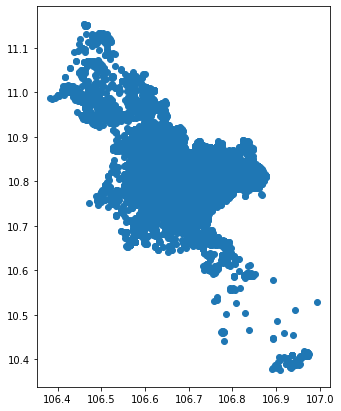

In [136]:
data_sjoin["geometry"].plot(figsize=(7,7))

In [149]:
# Chạy KMean cho tập các điểm thuộc lần lượt các top 10 quận huyện này. Lấy K = 20.
def kmeans(data_frame, district, n_clusters=20):
    table = data_frame[data_frame.Dist_Name == district]
    kmeans = KMeans(n_clusters) 
    x = pd.Series(table['geometry'].apply(lambda p: p.x)) 
    y = pd.Series(table['geometry'].apply(lambda p: p.y)) 
    point = np.column_stack((x, y)) 
    y_means = kmeans.fit_predict(point) 
    table['cluster'] = y_means 
    return table

In [142]:
top_10_district

array(['District 9', 'Hoc Mon', 'Nha Be', 'District 12', 'District 2',
       'Cu Chi', 'District 7', 'Thu Duc', 'Binh Chanh', 'Binh Tan'],
      dtype=object)

In [145]:
random.seed(1)
k = 20

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [150]:
data_top_10 = [kmeans(data_sjoin, district, k) for district in top_10_district]
data_top_10

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

[         FID  dbh  ... Fastest_grow_rate  cluster
 24        24    1  ...          1.277619       14
 62        62    1  ...          1.277619        8
 70        70    1  ...          1.277619        2
 79        79    1  ...          1.277619        0
 96        96    1  ...          1.277619        3
 ...      ...  ...  ...               ...      ...
 27703  27703    1  ...          1.277619        6
 27738  27738    1  ...          1.277619       11
 27759  27759    1  ...          1.277619       12
 27760  27760    1  ...          1.277619       16
 27763  27763    1  ...          1.277619       16
 
 [1960 rows x 31 columns],          FID  dbh  ... Fastest_grow_rate  cluster
 11        11    1  ...          1.215639        1
 45        45    1  ...          1.215639       10
 122      122    1  ...          1.215639        9
 139      139    1  ...          1.215639       13
 141      141    1  ...          1.215639        3
 ...      ...  ...  ...               ...      ...
 27

In [170]:
def heat_data(table): 
    index = table['cluster'].value_counts().idxmax()
    table = table[(table['cluster'] == index)]
    heat_data = [[row['geometry'].y,row['geometry'].x] for index, row in table.iterrows()]
    return heat_data

In [173]:
map = folium.Map(location=[10.8, 107], zoom_start=10, tiles='CartoDB positron')
for _, r in df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(map)

data_sjoin = data_sjoin.to_crs(epsg=2263)
data_sjoin['centroid'] = data_sjoin.centroid
data_sjoin = data_sjoin.to_crs(epsg=4326)
data_sjoin['centroid'] = data_sjoin['centroid'].to_crs(epsg=4326)

for district in data_top_10:
    HeatMap(heat_data(district)).add_to(map)

In [196]:
map

In [197]:
fn = 'output.html'
map.save(fn)
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=mapFname)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
driver.get(tmpurl);
time.sleep(5)
driver.save_screenshot('output.png')
driver.quit()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Err:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Release
  404  Not Found [IP: 65.8.185.22 443]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/rest